In [54]:
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv('diabetes.csv') 

In [16]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
5,5,116,74,0,0,25.6,0.201,30,False
6,3,78,50,32,88,31.0,0.248,26,True
7,10,115,0,0,0,35.3,0.134,29,False
8,2,197,70,45,543,30.5,0.158,53,True
9,8,125,96,0,0,0.0,0.232,54,True


In [17]:
df.isnull().values.any()  # check weather data set has null values or not

False

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

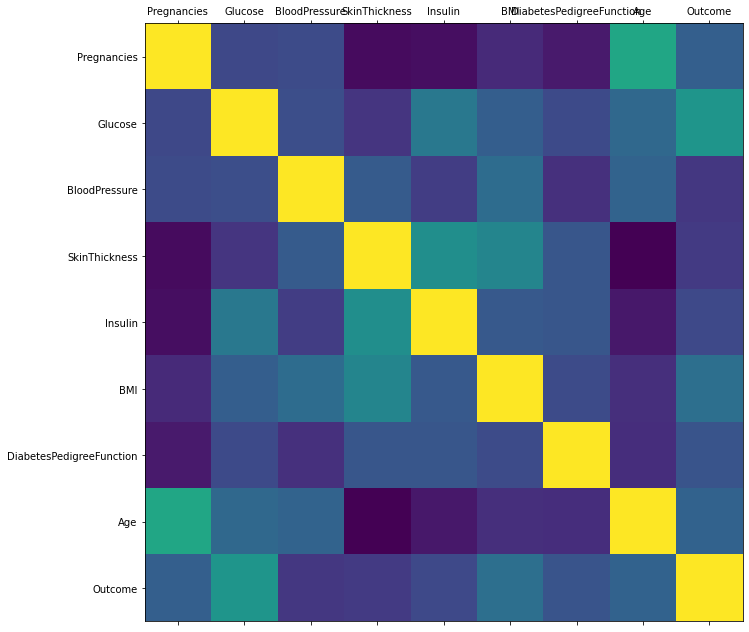

In [58]:
def plot_df(df,size = 11):
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr)),corr.columns)
    plt.yticks(range(len(corr)),corr.columns)
plot_df(df) 
# sns.heatmap(df,yticklabels =False)

# Data Encoding

In [22]:
# Change one form into another form
# categorical data --> integer data

In [23]:
mapping = {True:1,False:0}
df['Outcome'] = df['Outcome'].map(mapping)

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Splitting

In [27]:
from sklearn.model_selection import train_test_split # for splitting data us ethis library

In [28]:
col_name = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [29]:
predict_col_name = ['Outcome'] # dependent variable name

In [45]:
X = df[col_name].values
Y = df[predict_col_name].values

In [49]:
split_size = 0.40 # test data size 40%

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = split_size, random_state = 43)
# We split the data into 40% and 60%

In [53]:
print('Training data is {0:0.2f}%'.format(float(len(X_train))/float(len(df.index))*100))
print('Testing data is {0:0.2f}%'.format(float(len(X_test))/float(len(df.index))*100))

Training data is 59.90%
Testing data is 40.10%


# Missing data (Impute missing)

In [59]:
# Impute --> Replace

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
replace_value = SimpleImputer(missing_values=0,strategy='mean')
X_train = replace_value.fit_transform(X_train)
X_test = replace_value.fit_transform(X_test)

In [62]:
print(X_train)

[[  2.          83.          65.         ...   0.629       24.
    1.        ]
 [  3.         148.          66.         ...   0.256       22.
    1.        ]
 [  1.         181.          64.         ...   0.328       38.
    1.        ]
 ...
 [  4.60769231 104.          64.         ...   0.454       23.
    1.        ]
 [  1.         113.          64.         ...   0.543       21.
    1.        ]
 [  4.         129.          60.         ...   0.527       31.
    1.        ]]


# Feature Scaling

In [1]:
# there is a big difference between 2 features so that to ML algo gives only imp. to higher value not lower one.

In [2]:
# To solve this problem we are doing feauture scaling

In [53]:
import pandas as pd
from sklearn import preprocessing

In [54]:
exam_data = pd.read_csv("exam.csv",quotechar='"')

In [55]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
# Change into floating value
exam_data[['math score']]    = exam_data[['math score']].astype(float)
exam_data[['reading score']] = exam_data[['reading score']].astype(float)
exam_data[['writing score']] = exam_data[['writing score']].astype(float)

In [57]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [58]:
# Scaling
exam_data[['math score']] = preprocessing.scale(exam_data[['math score']])
exam_data[['reading score']] = preprocessing.scale(exam_data[['reading score']])
exam_data[['writing score']] = preprocessing.scale(exam_data[['writing score']])

In [59]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492
1,female,group C,some college,standard,completed,0.192076,1.427476,1.313269
2,female,group B,master's degree,standard,none,1.577711,1.770109,1.642475
3,male,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744
4,male,group C,some college,standard,none,0.653954,0.605158,0.457333


In [60]:
# For plotting 
df_plot = exam_data[['math score','reading score','writing score']].copy()

<AxesSubplot:ylabel='Density'>

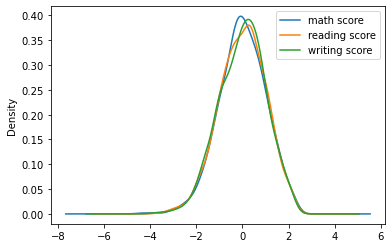

In [61]:
df_plot.plot.kde()

 # Label Encoding

In [62]:
# Convert Text/Categorical data into Integer Value

In [64]:
le = preprocessing.LabelEncoder()
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))

In [65]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492
1,0,group C,some college,standard,completed,0.192076,1.427476,1.313269
2,0,group B,master's degree,standard,none,1.577711,1.770109,1.642475
3,1,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744
4,1,group C,some college,standard,none,0.653954,0.605158,0.457333


 # One Hot Encoder

In [66]:
exam_data = pd.get_dummies(exam_data,columns=['race/ethnicity','parental level of education','lunch','test preparation course'])

In [67]:
exam_data.head()

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.390024,0.193999,0.391492,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0.192076,1.427476,1.313269,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,0,1.577711,1.770109,1.642475,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,-1.259543,-0.833899,-1.583744,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,1,0.653954,0.605158,0.457333,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
